In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [116]:
df = pd.read_csv('/workspaces/EDA_5_alfonso/data/raw/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


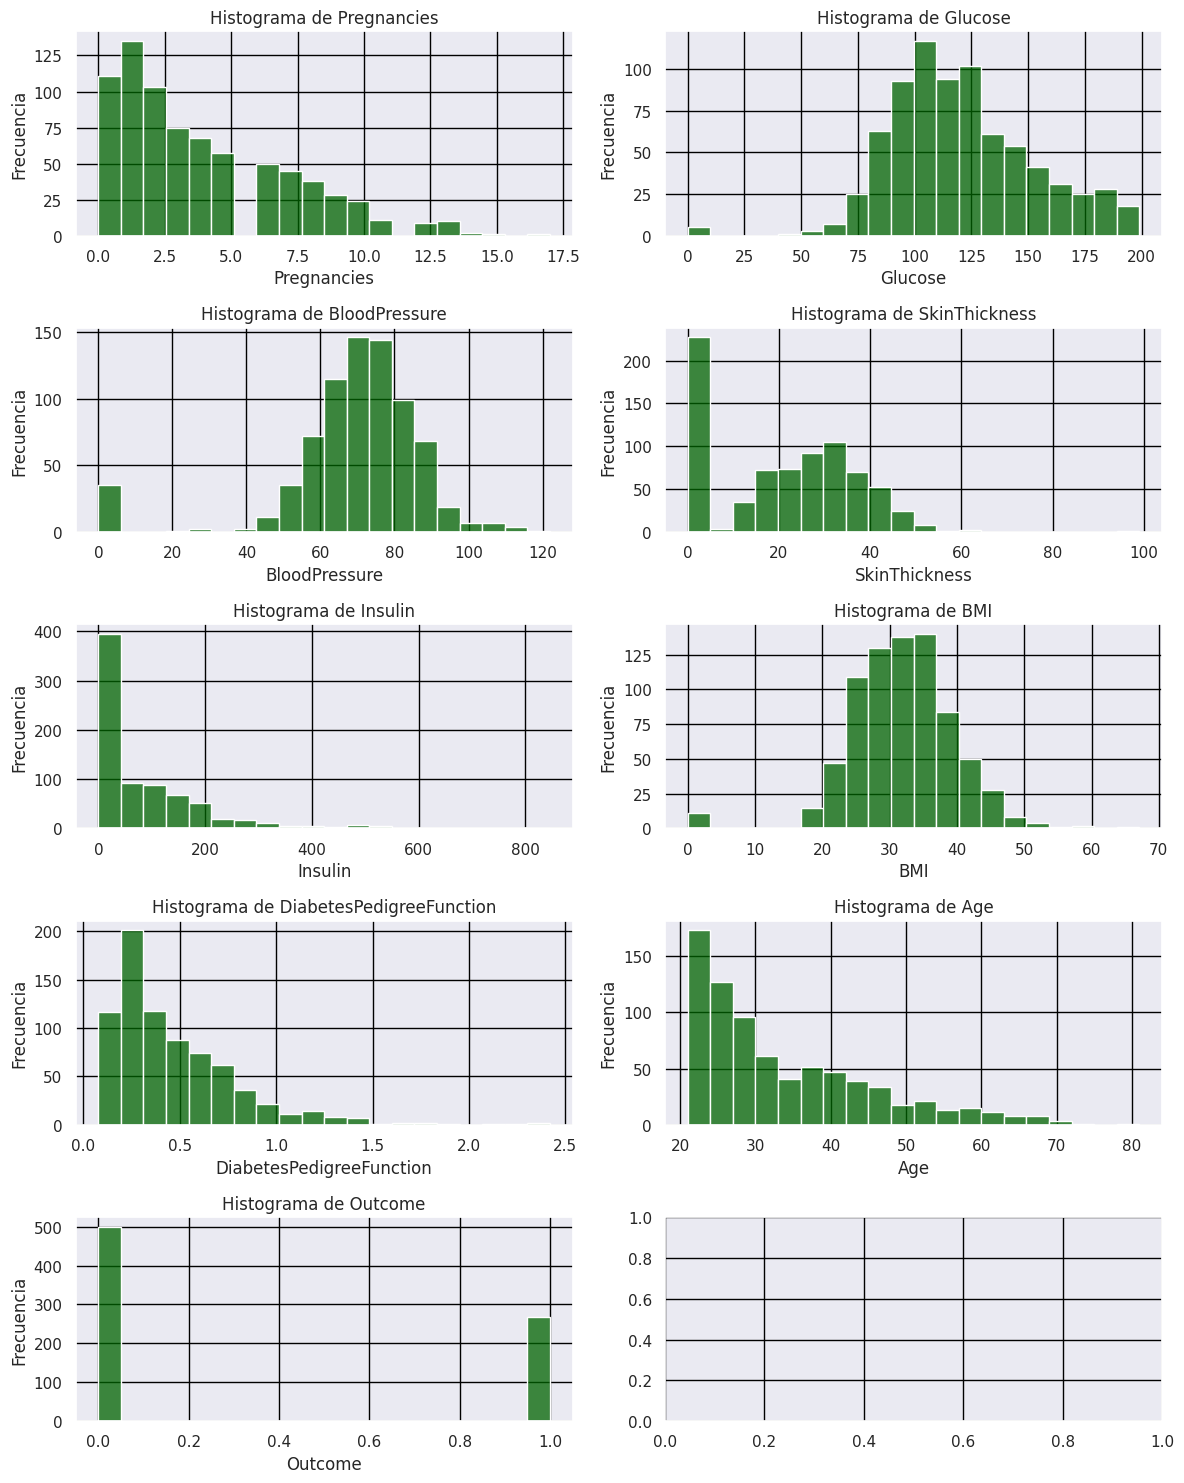

In [118]:
sns.set(rc={'axes.facecolor': '#eaeaf2', 'grid.color': 'black'})

# Obtener el número de columnas en el DataFrame
num_columns = len(df.columns)

# Establecer el número de subgráficos por fila
num_subplots_per_row = 2

# Calcular el número total de filas necesarias
num_rows = (num_columns + num_subplots_per_row - 1) // num_subplots_per_row

# Crear subgráficos
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, 3 * num_rows))

# Aplanar la matriz de subgráficos para facilitar la iteración
axes = axes.flatten()

# Iterar por cada columna y crear un histograma
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=False, bins=20, color='darkgreen', ax=ax)  # Puedes ajustar los parámetros según tus preferencias
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

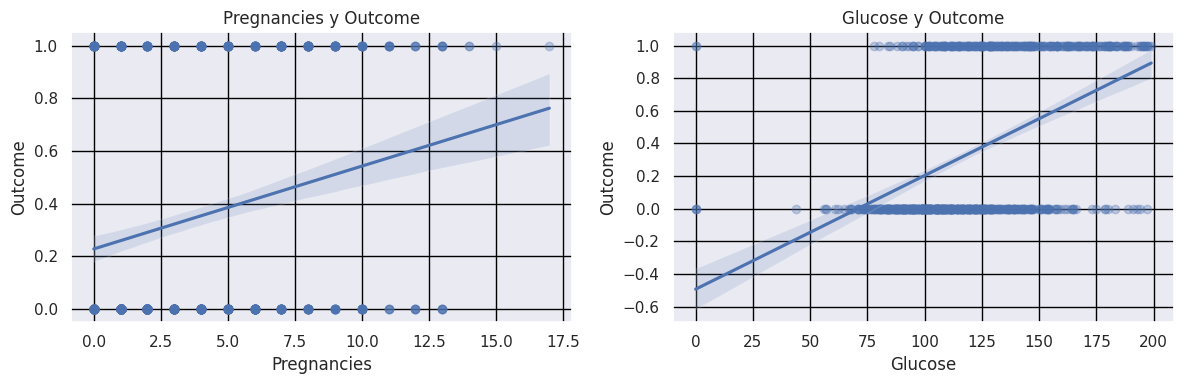

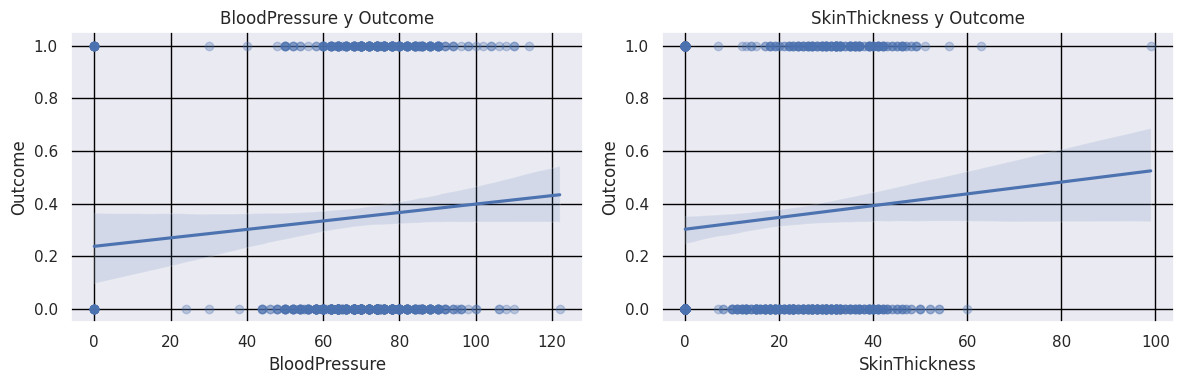

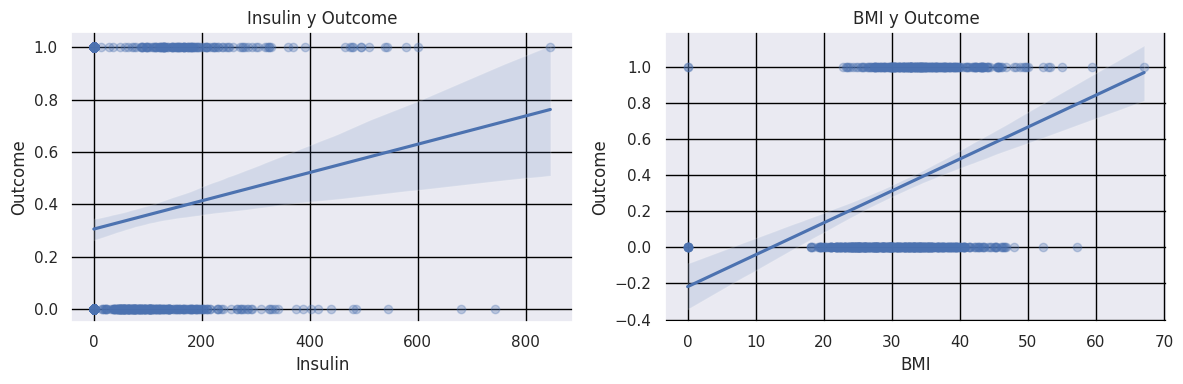

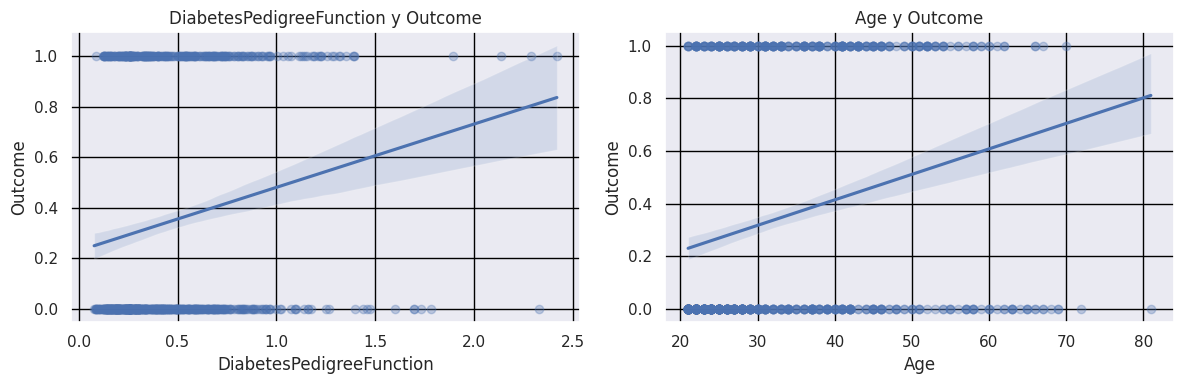

In [119]:
target_column = 'Outcome'

feature_columns = [col for col in df.columns if col != target_column]

# Dividir las columnas en pares
column_pairs = [(feature_columns[i], feature_columns[i+1]) if i+1 < len(feature_columns) else (feature_columns[i], None) for i in range(0, len(feature_columns), 2)]

# Iterar a través de los pares de columnas y trazar regplots
for pair in column_pairs:
    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Iterar sobre las dos columnas del par
    for i, feature_column in enumerate(pair):
        if feature_column is not None:
            # Crear un gráfico de dispersión con línea de regresión
            sns.regplot(x=feature_column, y=target_column, data=df, scatter_kws={'alpha':0.3}, ax=axes[i])
            
            # Configuración del título y etiquetas
            axes[i].set_title(f'{feature_column} y {target_column}')
            axes[i].set_xlabel(feature_column)
        else:
            # Si la columna es None, eliminar el segundo eje
            fig.delaxes(axes[i])
    
    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

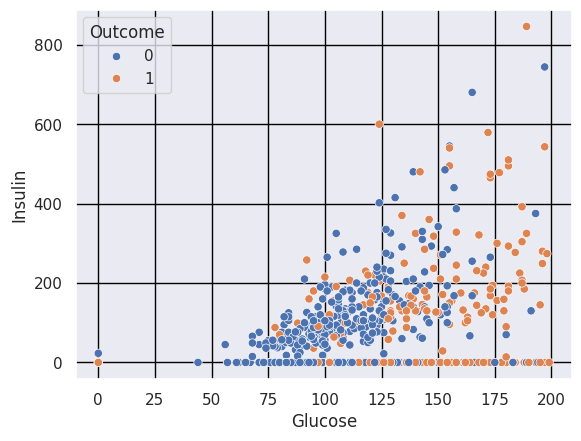

In [120]:
sns.scatterplot(data = df, x = "Glucose", y = "Insulin", hue = "Outcome")
plt.show()

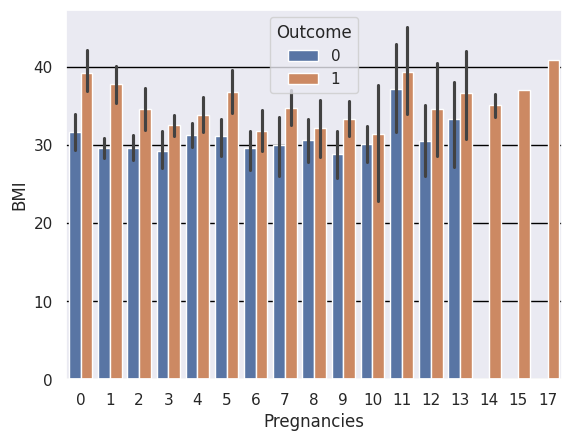

In [121]:
sns.barplot(data = df, x = "Pregnancies", y = "BMI", hue = "Outcome")
plt.show()

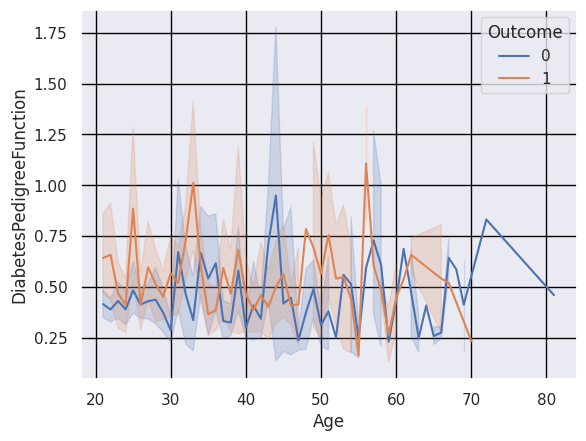

In [122]:
sns.lineplot(data = df, x = "Age", y = "DiabetesPedigreeFunction", hue = "Outcome")
plt.show()

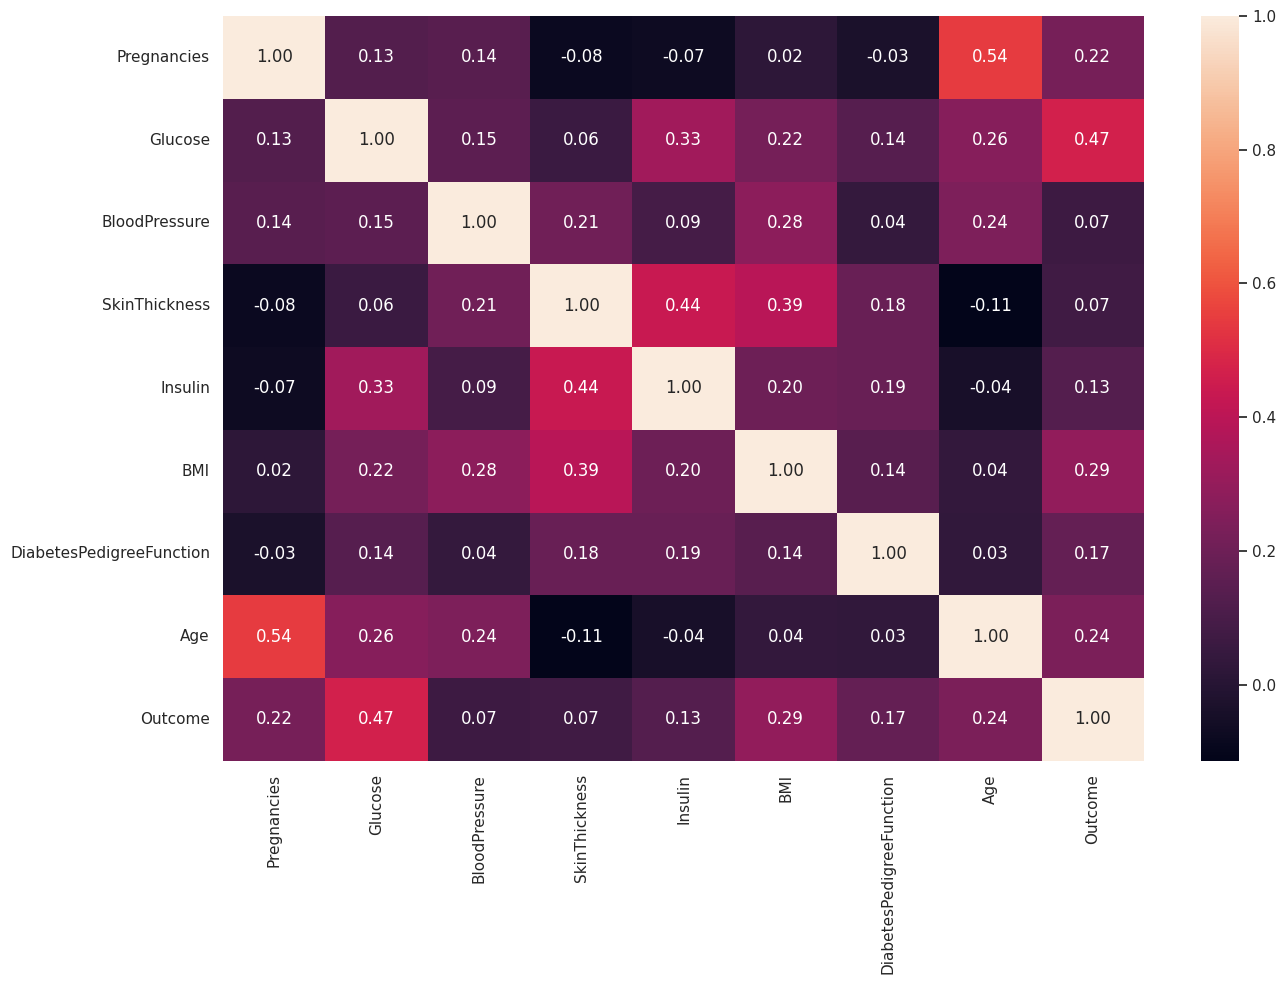

In [123]:
fig, axis = plt.subplots(figsize = (14, 10))
lista_de_columnas = df.columns.tolist()
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [124]:
df.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42


<Axes: ylabel='SkinThickness'>

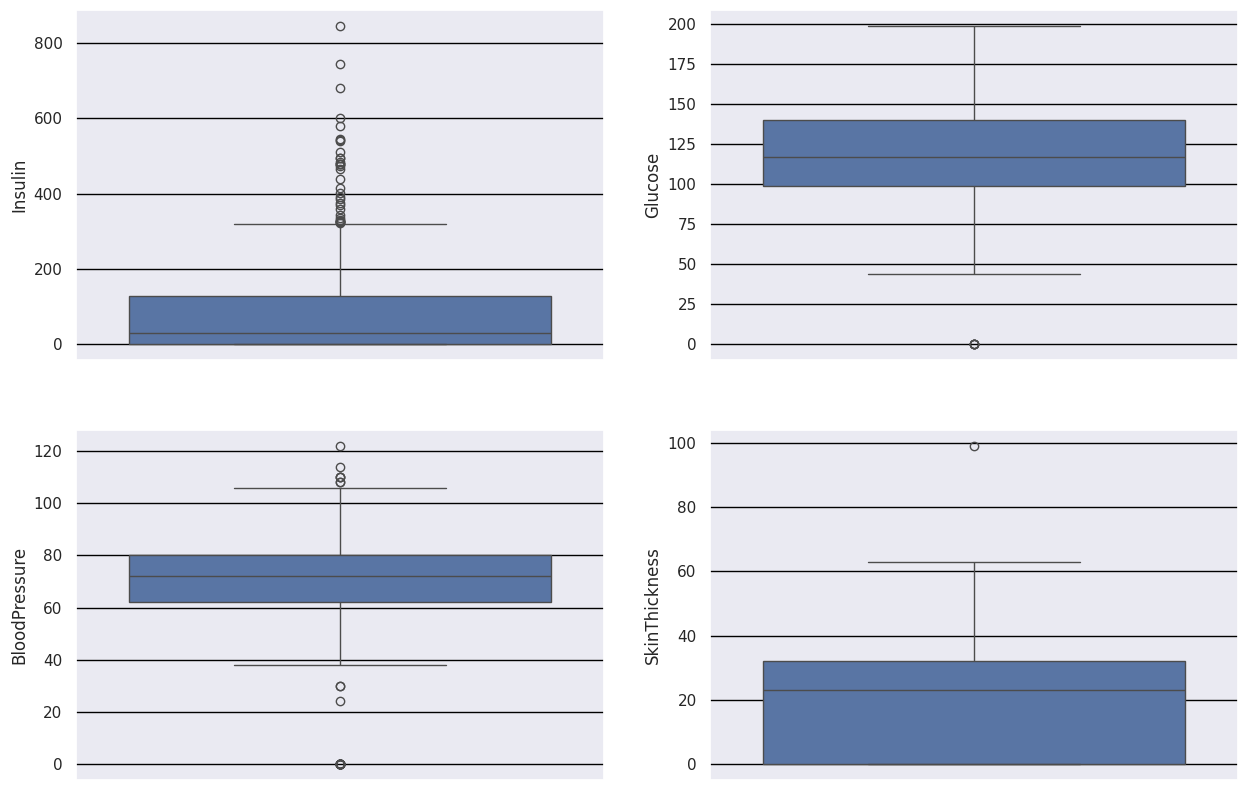

In [125]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(ax = axis[0, 0], data = df, y = "Insulin")
sns.boxplot(ax = axis[0, 1], data = df, y = "Glucose")
sns.boxplot(ax = axis[1, 0], data = df, y = "BloodPressure")
sns.boxplot(ax = axis[1, 1], data = df, y = "SkinThickness")

In [126]:
upper_biggot = 127.25
df.loc[df["Insulin"] > upper_biggot, "Insulin"] = upper_biggot


/tmp/ipykernel_474/1163528026.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '127.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Insulin"] > upper_biggot, "Insulin"] = upper_biggot


In [127]:
df["Insulin"]

0        0.00
1        0.00
2        0.00
3       94.00
4      127.25
        ...  
763    127.25
764      0.00
765    112.00
766      0.00
767      0.00
Name: Insulin, Length: 768, dtype: float64

<Axes: ylabel='Insulin'>

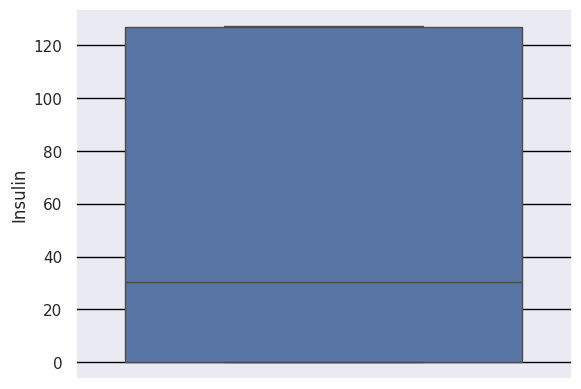

In [128]:
sns.boxplot(data = df, y = "Insulin")

In [129]:
columns_to = [
    "Insulin",
    "Glucose",
    "BloodPressure", 
    "SkinThickness"
]

outliers_idx = []

for column in columns_to:
    outliers_idx.append(df[column].idxmax())

for idx in outliers_idx:
    print("")
    print(df.iloc[idx])


Pregnancies                   0.000
Glucose                     137.000
BloodPressure                40.000
SkinThickness                35.000
Insulin                     127.250
BMI                          43.100
DiabetesPedigreeFunction      2.288
Age                          33.000
Outcome                       1.000
Name: 4, dtype: float64

Pregnancies                   1.000
Glucose                     199.000
BloodPressure                76.000
SkinThickness                43.000
Insulin                       0.000
BMI                          42.900
DiabetesPedigreeFunction      1.394
Age                          22.000
Outcome                       1.000
Name: 661, dtype: float64

Pregnancies                   1.000
Glucose                      96.000
BloodPressure               122.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          22.400
DiabetesPedigreeFunction      0.207
Age                          27.000
Outcome    

In [130]:
columnas1 = ['Glucose', 'BloodPressure']
df[columnas1] = df[columnas1].applymap(lambda x: x if x >= 40 else pd.NA)

columnas2 = ['BMI', 'SkinThickness', 'Insulin']
for col in columnas2:
    df[col] = df[col].replace(0, pd.NA)

columnas_cero = columnas1 + columnas2

/tmp/ipykernel_474/1417118911.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columnas1] = df[columnas1].applymap(lambda x: x if x >= 40 else pd.NA)


In [131]:
df["BMI"].sort_values(ascending = True)

418    18.2
438    18.2
526    18.2
239    18.4
90     19.1
       ... 
426    <NA>
494    <NA>
522    <NA>
684    <NA>
706    <NA>
Name: BMI, Length: 768, dtype: object

In [132]:
df["SkinThickness"].sort_values(ascending = True)

254       7
519       7
434       8
382       8
279      10
       ... 
757    <NA>
758    <NA>
759    <NA>
762    <NA>
766    <NA>
Name: SkinThickness, Length: 768, dtype: object

In [133]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                39
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [134]:
df[columnas_cero] = df[columnas_cero].fillna(df[columnas_cero].median())

In [135]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [136]:
df["BMI"].sort_values(ascending = True)

438    18.2
418    18.2
526    18.2
239    18.4
90     19.1
       ... 
120    53.2
125    55.0
673    57.3
445    59.4
177    67.1
Name: BMI, Length: 768, dtype: float64

In [137]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24, stratify = y)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
712,10,129.0,62.0,36.0,125.00,41.2,0.441,38
626,0,125.0,68.0,29.0,125.00,24.7,0.206,21
157,1,109.0,56.0,21.0,127.25,25.2,0.833,23
401,6,137.0,61.0,29.0,125.00,24.2,0.151,55
355,9,165.0,88.0,29.0,125.00,30.4,0.302,49


In [138]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
163,2,100.0,64.0,23.0,125.0,29.7,0.368,21
759,6,190.0,92.0,29.0,125.0,35.5,0.278,66
379,0,93.0,100.0,39.0,72.0,43.4,1.021,35
556,1,97.0,70.0,40.0,125.0,38.1,0.218,30
504,3,96.0,78.0,39.0,125.0,37.3,0.238,40


In [139]:
y_train.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_train.csv", index = False)
y_test.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_test.csv", index=False)
X_train.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_train.csv", index=False)
X_test.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_test.csv", index=False)